# Problem 2

## Problem Description
In this problem you will train a neural network to classify points with features $x_0$ and $x_1$ belonging to one of three classes, indicated by the label $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an accuracy for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model accuracy
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [711]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def dataGen():
    # random_state = 0 set so generated samples are identical
    x, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 3, random_state = 0)
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 100
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]), max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]), max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = torch.argmax(model(Xgrid), dim = 1)
    # Plot data
    plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
    # Plot model
    plt.contourf(Xgrid[:,0].reshape(n,n), Xgrid[:,1].reshape(n,n), Ypred.reshape(n,n), cmap = ListedColormap(['red', 'blue', 'magenta']), alpha = 0.15)
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 2D scatter plot, coloring points according to their labels.

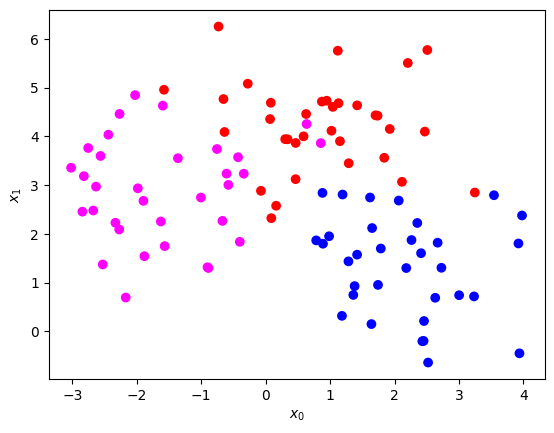

In [712]:
# YOUR CODE GOES HERE
# generate data
x, y = dataGen()

# plot 2D scatter plot
plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An accuracy of 0.9 or more is reasonable. 

Hint: think about the number out nodes in your output layer and choice of output layer activation function for this multi-class classification problem.

In [713]:
# YOUR CODE GOES HERE
# import utility functions
from torch import optim, nn 
import torch.nn.functional as F

# convert data to tensor
x = torch.Tensor(x)
y = torch.Tensor(y).long()

# define model
class Net_3_layer(nn.Module):
    def __init__(self, N_hidden=5, N_in=2, N_out=3, activation = F.relu):
        super().__init__()
        self.lin1 = nn.Linear(N_in, N_hidden)
        self.lin2 = nn.Linear(N_hidden, N_hidden)
        self.lin3 = nn.Linear(N_hidden, N_hidden)
        self.lin4 = nn.Linear(N_hidden, N_out)
        self.act = activation

        # other activation functions
        if activation == F.relu:
            self.act = nn.ReLU()
        elif activation == F.sigmoid:
            self.act = nn.Sigmoid()
        elif activation == F.tanh:
            self.act = nn.Tanh()
        elif activation == F.leaky_relu:
            self.act = nn.LeakyReLU()
        elif activation == F.gelu:
            self.act = nn.GELU()
        else:
            self.act = nn.Identity()

    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x) 
        x = F.softmax(x, dim=1)  # Activation at third hidden layer (softmax for classification problem)
        # x = self.act(x)  # Activation at third hidden layer
        x = self.lin4(x) # (No activation at last layer)

        return x

# instantiate model
# ReLU
# model = Net_3_layer(N_hidden=5, N_in=2, N_out=3, activation=F.relu)
# Sigmoid
# model = Net_3_layer(N_hidden=5, N_in=2, N_out=3, activation=F.sigmoid)
# Tanh
# model = Net_3_layer(N_hidden=5, N_in=2, N_out=3, activation=F.tanh)
# Leaky ReLU
model = Net_3_layer(N_hidden=5, N_in=2, N_out=3, activation=F.leaky_relu)
# GELU
# model = Net_3_layer(N_hidden=5, N_in=2, N_out=3, activation=F.gelu)

# lose curve list
loss_curve = []

# train model
# lr = 0.0005     # learning rate
# lr = 0.00005
lr = 0.005
epochs = 1500   # number of epochs
loss_fcn = nn.CrossEntropyLoss()  # loss function

# Set up optimizer to optimize the model's parameters using Adam with the selected learning rate
opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    loss = loss_fcn(out,y) # Calculate the loss -- error between network prediction and y

    loss_curve.append(loss.item())

    # Print loss progress info 25 times during training
    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    # Move the model parameters 1 step closer to their optima:
    opt.zero_grad()
    loss.backward()
    opt.step()

Epoch 0 of 1500... 	Average loss: 1.1398591995239258
Epoch 60 of 1500... 	Average loss: 0.8802828788757324
Epoch 120 of 1500... 	Average loss: 0.6326925158500671
Epoch 180 of 1500... 	Average loss: 0.4106394052505493
Epoch 240 of 1500... 	Average loss: 0.30089858174324036
Epoch 300 of 1500... 	Average loss: 0.23634019494056702
Epoch 360 of 1500... 	Average loss: 0.20372045040130615
Epoch 420 of 1500... 	Average loss: 0.18274754285812378
Epoch 480 of 1500... 	Average loss: 0.16840240359306335
Epoch 540 of 1500... 	Average loss: 0.15831558406352997
Epoch 600 of 1500... 	Average loss: 0.15109066665172577
Epoch 660 of 1500... 	Average loss: 0.11400409787893295
Epoch 720 of 1500... 	Average loss: 0.10398337990045547
Epoch 780 of 1500... 	Average loss: 0.09954670071601868
Epoch 840 of 1500... 	Average loss: 0.09643104672431946
Epoch 900 of 1500... 	Average loss: 0.09402863681316376
Epoch 960 of 1500... 	Average loss: 0.09212164580821991
Epoch 1020 of 1500... 	Average loss: 0.0905495062470436

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

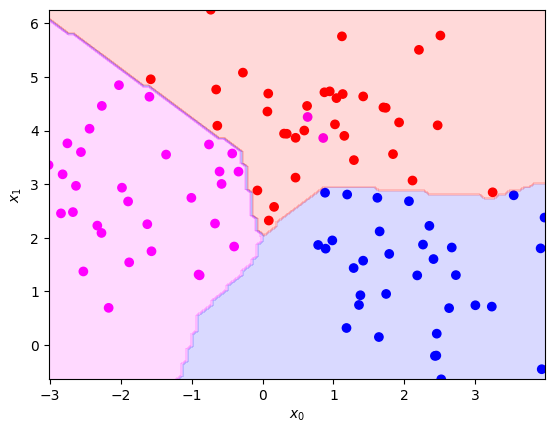

Model accuracy: 98.00%


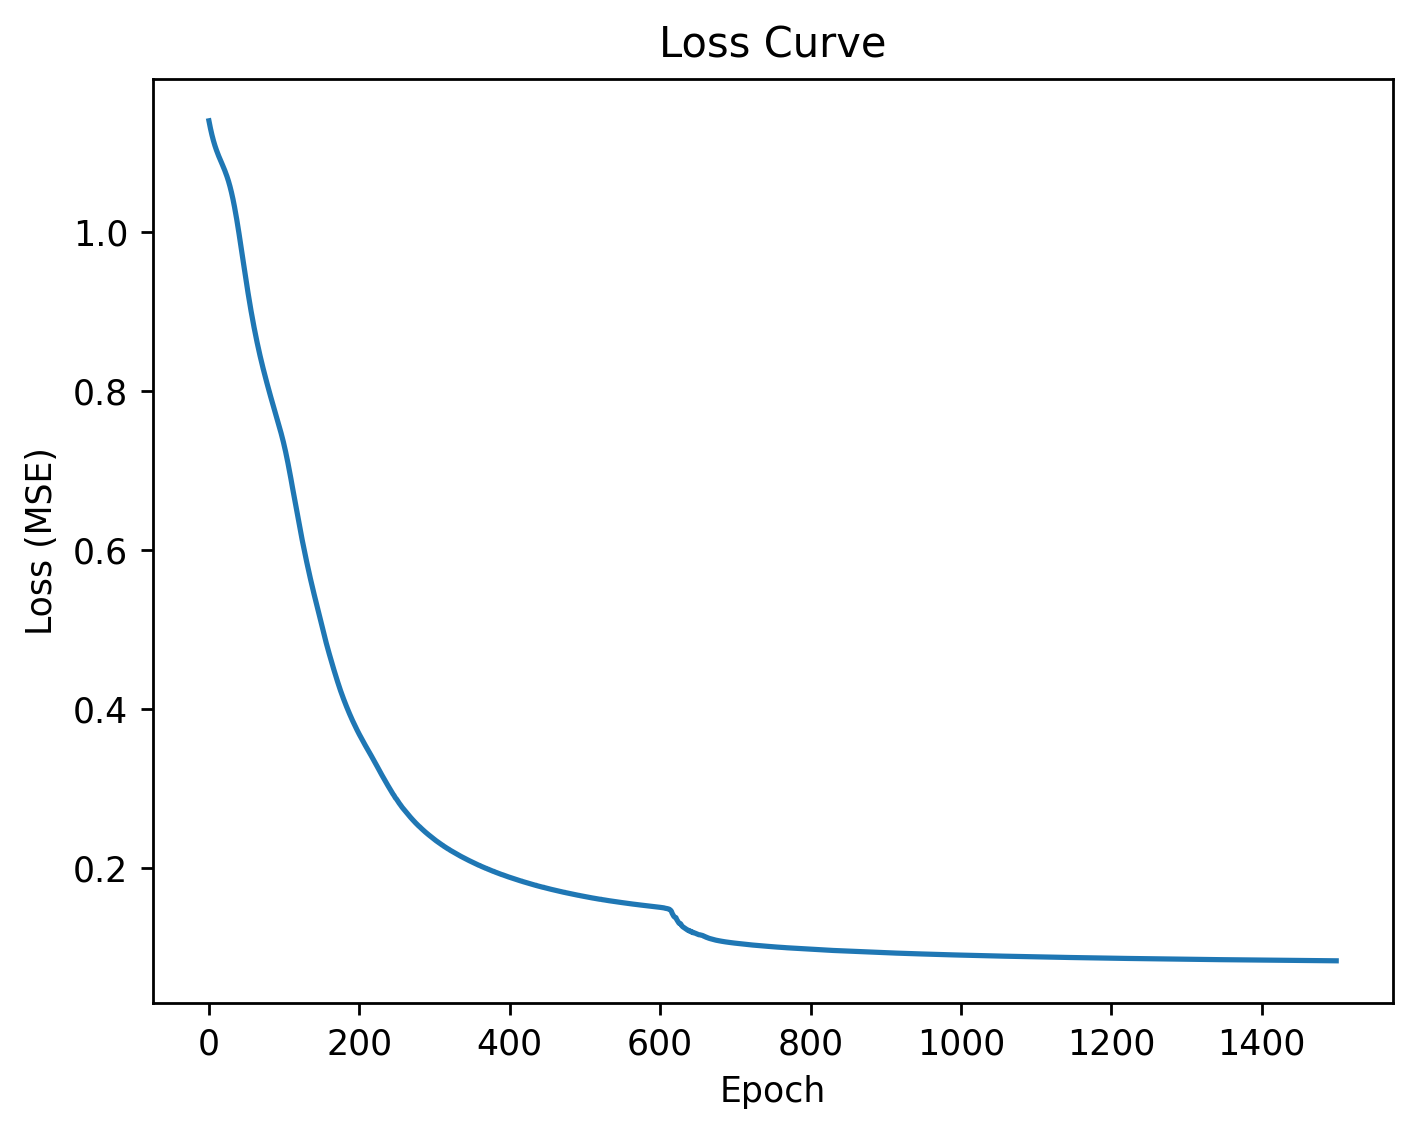

In [714]:
# YOUR CODE GOES HERE
# visualize model
visualizeModel(model)

# model accuracy
#model's predictions
y_pred = torch.argmax(model(x), dim=1)
# calculate the accuracy of the model
accuracy = (y_pred == y).float().mean()
accuracy = accuracy * 100
print (f"Model accuracy: {accuracy.item():.2f}%")

# plot loss curve
plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

## Discussion
Report the accuracy of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

Model structure and parameters:

    3 hidden layers with 5 neurons per hidden layer and an output layer with 3 neurons and a Softmax activation function (suitable for multi-class problem), Leaky Relu as activation function, Cross-entropy loss as the loss function for multi-class problems, optimized using the Adam optimizer with a learning rate of 0.005 for 1500 training epochs. 

Model performance: 

    The Cross-entropy loss of my trained model on the generated data is around 0.0886. The model prediction accuracy is around 98%.

Model design reasoning and parameter experiments:
    
    The model's activation function and learning rate were determined by trial and error. Several activation functions like ReLu, Sigmoid, Tanh, GELU, and Leaky ReLu were explored, and the Leaky ReLu results in the lowest MSE. I also experimented with varying learning rates to determine the model outcome. The results showed that a smaller learning rate converged faster in our use case and overfitting may occur if not done properly. I also test the number of neurons in each hidden layer. The results appeared to be overfitting the data with a larger number of neurons. Other parameters were referred from M7-L2-P2 and M7-HW1.
